<a href="https://colab.research.google.com/github/jalbury/machine-learning/blob/master/HW_2/HW2_Problem2_John_Albury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 2, Problem 2

## Description

In this problem, we are asked to extend [Dr. Wocjan's code for mini-batch gradient descent](https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb) to support two features, meaning the model parameters will now be two weights $w_1$ and $w_2$ and the bias $b$.

To solve this problem, I modified Dr. Wocjan's code and used `matplotlib` for displaying 3D plots of the data.

## Solution

### Imports

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate random data

First, we'll generate points along the plane $y = 3x_1 + 2x_2 + 4$, with some random noise added. 

In [0]:
m = 100
X = 2 * np.random.rand(m, 2)
y = 4 + 3 * X[:, [0]] + 2 * X[:, [1]] + np.random.rand(m, 1)

The code below shows several angles of the generated data.

Text(0.5, 0, '$y$')

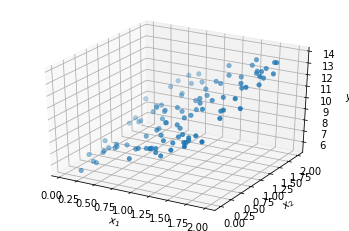

In [59]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, [0]], X[:, [1]], y, cmap='viridis', linewidth=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

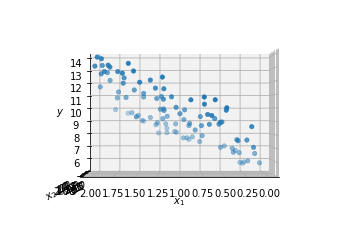

In [60]:
ax.view_init(0, 90)
fig

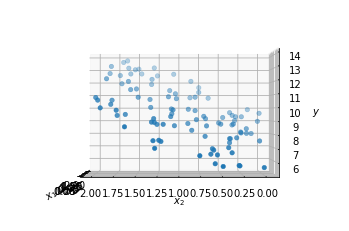

In [61]:
ax.view_init(0, 180)
fig

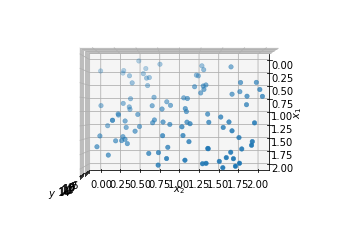

In [62]:
ax.view_init(90, 0)
fig

### Combine bias $b = w_0$ and weight $w_1$

Linear regression predicts $\hat{y}=b + w_1 x_1 + w_2 x_2$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1, w_2)$ and $x=(1, x_1, x_2)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

In [64]:
print(X_b.shape)

(100, 3)


In [66]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         1.06448998 0.25148302]
 [1.         0.26542931 0.28708472]
 [1.         1.87963958 1.46579784]
 [1.         0.32476379 0.37669817]
 [1.         1.46165895 0.31232769]]


### Linear regression using mini-batch gradient descent

We'll now run mini-batch gradient descent to tune the parameters of the model.

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

The code below shows the final parameters for the trained model. These should correspond closely with our equation for the plane we're approximating: $y = 3x_1 + 2x_2 + 4$. That is, the bias should be near 4.0, $w_1$ should be near 3.0, and $w_2$ should be near 2.0.

In [71]:
print("bias: {}".format(weight_path_mgd[-1][0]))
print("w1: {}".format(weight_path_mgd[-1][1]))
print("w2: {}".format(weight_path_mgd[-1][2]))

bias: [3.63497943]
w1: [3.15564737]
w2: [2.59278687]


### Display the predictions of the trained model

In order to compare the predictions of our model to the plane we were trying to approximate, we'll generate points along the plane according to the weights and bias of the model.

In [0]:
y_pred = weight_path_mgd[-1][0] + weight_path_mgd[-1][1] * X[:, [0]] + weight_path_mgd[-1][2] * X[:, [1]]

The below code shows the model's predictions on the original feature data. As can be seen from the plots, the predictions end up looking very similar to the plane we were trying to approximate: $y = 3x_1 + 2x_2 + 4$ (shown in the "Generate random data" section).

Text(0.5, 0, '$\\hat{y}$')

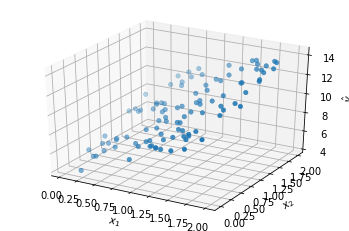

In [73]:
fig_pred = plt.figure()
ax_pred = plt.axes(projection='3d')
ax_pred.scatter(X[:, [0]], X[:, [1]], y_pred, cmap='viridis', linewidth=0.5)
ax_pred.set_xlabel('$x_1$')
ax_pred.set_ylabel('$x_2$')
ax_pred.set_zlabel('$\hat{y}$')

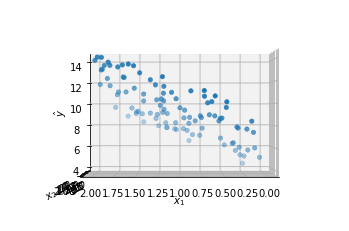

In [74]:
ax_pred.view_init(0, 90)
fig_pred

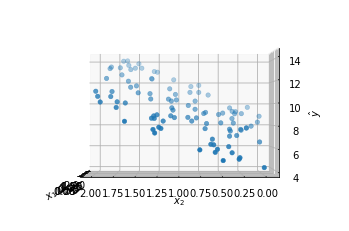

In [75]:
ax_pred.view_init(0, 180)
fig_pred

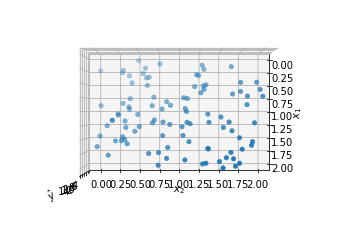

In [76]:
ax_pred.view_init(90, 0)
fig_pred